## **Traditional (Maximum Likelihood Decoding)**

# Loading Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading codebook file

Loading codebook file from the generated codewords and we separate the data to codeword and message.

In [3]:
def load_codebook(fname):
  df = pd.read_csv(fname)
  y = df[["x0", "x1", "x2", "x3", "x4", "x5", "x6"]].values
  m = df[["m0", "m1", "m2", "m3"]].values
  file_size = y.shape[0]
  return y, m, file_size

# Maximum Likelihood Decoding

We first generate the all possible codewords by the generator matrix. Next, we calculate the norm between received codeword and all possible codeword. We make the decision (m_hat) by choosing the one with minimum norm.

In [9]:
def ML_decode(y):
  # type your own code
  # construct generator matrix
  G = np.array([[1, 0, 0, 0, 1, 1, 0],
                [0, 1, 0, 0, 1, 0, 1],
                [0, 0, 1, 0, 0, 1, 1],
                [0, 0, 0, 1, 1, 1, 1]])

  # construct all possible messages
  all_messages = np.array([[0, 0, 0, 0],
                           [0, 0, 0, 1],
                           [0, 0, 1, 0],
                           [0, 0, 1, 1],
                           [0, 1, 0, 0],
                           [0, 1, 0, 1],
                           [0, 1, 1, 0],
                           [0, 1, 1, 1],
                           [1, 0, 0, 0],
                           [1, 0, 0, 1],
                           [1, 0, 1, 0],
                           [1, 0, 1, 1],
                           [1, 1, 0, 0],
                           [1, 1, 0, 1],
                           [1, 1, 1, 0],
                           [1, 1, 1, 1]])
                     
  # construct all possible codewords
  all_codewords = np.mod(np.dot(all_messages, G), 2)
  
  # map codeword 0, 1 to -1, 1
  all_codewords = 2 * all_codewords - 1

  # find the codeword with the minimum norm
  m_hat = np.zeros((y.shape[0], 4), dtype=int)
  
  for i in range(y.shape[0]):
    min_norm = np.inf
    for j in range(all_codewords.shape[0]):
      norm = np.linalg.norm(y[i] - all_codewords[j])
      if norm < min_norm:
        min_norm = norm
        m_hat[i] = all_messages[j]
          
  return m_hat

Next, we compare our recovered signal m_hat and message m. If they are the same, it means we received the signal correctly. We calculated the symbol error rate to see how our decoding scheme performed.

# Performance Evaluation

We go through all codewords to calculate the symbol error rate and bit error rate.

In [6]:
def calculate_error(m_hat,m):
  # type your own code
  # compare between m_hat and m to get all the error elements
  sym_err = np.sum(np.any(m_hat != m, axis=1))
  bit_err = np.sum(m_hat != m)
  return sym_err, bit_err

# Main Function

0 / 7
1 / 7
2 / 7
3 / 7
4 / 7
5 / 7
6 / 7
7 / 7


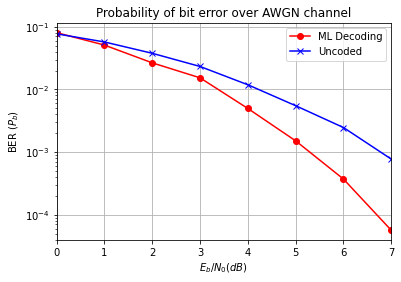

Bit Error Rate: [8.05625e-02 5.10625e-02 2.65625e-02 1.53125e-02 4.96250e-03 1.50875e-03
 3.70000e-04 5.62500e-05]


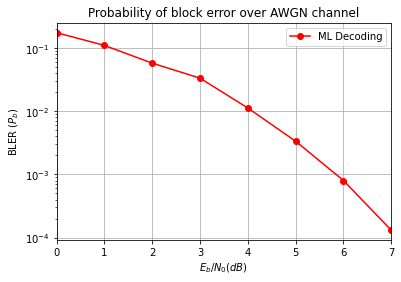

Block Error Rate: [1.7625e-01 1.1075e-01 5.8000e-02 3.3500e-02 1.1275e-02 3.3550e-03
 8.0000e-04 1.3000e-04]


In [10]:
# SNR setting
SNR_start = 0
SNR_end = 7
step_size = 1
SNR = np.arange(SNR_start,SNR_end+1,step_size)
length_SNR = len(SNR)
BLER = np.zeros(length_SNR)
BER = np.zeros(length_SNR)

# main
for i in range(length_SNR):
  fname = "codeword_file_SNR="+str(SNR[i])+".csv"

  # type your own code (apply the defined function)
  # load codeword
  y, m, file_size = load_codebook(fname)
  
  # maximum likelihood decoding
  m_hat = ML_decode(y)

  # calculate error
  sym_err, bit_err = calculate_error(m_hat, m)

  BER[i] = bit_err/4/file_size
  BLER[i] = sym_err/file_size
  print(i,"/",len(SNR)-1)
# Fig plot
BER_uncoded = [0.07721, 0.05723, 0.03774, 0.02324, 0.01186, 0.00549, 0.00246, 0.00077]
EbN0dBs = np.arange(start=SNR_start,stop=SNR_end+1,step=step_size)
fig1 = plt.figure()
plt.semilogy(EbN0dBs,BER,color='r',marker='o',linestyle='-',label='ML Decoding')
plt.semilogy(EbN0dBs,BER_uncoded,color='b',marker='x',linestyle='-',label='Uncoded')
plt.xlabel('$E_b/N_0(dB)$');plt.ylabel('BER ($P_b$)')
plt.title('Probability of bit error over AWGN channel')
plt.xlim(SNR_start,SNR_end);plt.grid(True);
plt.legend()
plt.show()
print("Bit Error Rate:", BER)
fig2 = plt.figure()
plt.semilogy(EbN0dBs,BLER,color='r',marker='o',linestyle='-',label='ML Decoding')
plt.xlabel('$E_b/N_0(dB)$');plt.ylabel('BLER ($P_b$)')
plt.title('Probability of block error over AWGN channel')
plt.xlim(SNR_start,SNR_end);plt.grid(True);
plt.legend()
plt.show()
print("Block Error Rate:", BLER)
#print("Your name and the date you demo.")